# L5: Structured Generation: Beyond JSON!


<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from utils import template
import outlines
from outlines.samplers import greedy

<div style="background-color:#fff6ff; padding:13px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px">
<p> 💻 &nbsp; <b>Access <code>requirements.txt</code> and <code>helper.py</code> files:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>.

<p> ⬇ &nbsp; <b>Download Notebooks:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Download as"</em> and select <em>"Notebook (.ipynb)"</em>.</p>

<p> 📒 &nbsp; For more help, please see the <em>"Appendix – Tips, Help, and Download"</em> Lesson.</p>
</div>

In [3]:
model_name = "HuggingFaceTB/SmolLM2-135M-Instruct"
model = outlines.models.transformers(model_name)

## Choice

In [4]:
prompt = template("""
Look at this restaurant review and classify its sentiment. 
Respond only with 'positive' or 'negative':

Review: The pizza a the was delicious, and the service was excellent.
""")

In [5]:
sentiment_regex = r'(positive|negative)'

In [6]:
chooser = outlines.generate.choice(
    model,
    ['positive', 'negative'],
    sampler=greedy()
)

In [7]:
chooser(prompt)

'positive'

## Phone number

In [8]:
phone_prompt = template("""
Extract the phone number from the example,
please use the format: (XXX) XXX-XXXX

206-555-1234

""")

In [9]:
phone_regex = r'\([0-9]{3}\) [0-9]{3}-[0-9]{4}'

In [10]:
phone_generator = outlines.generate.regex(
    model, 
    phone_regex,
    sampler=greedy()
)

In [11]:
phone_generator(phone_prompt)

'(206) 555-1234'

## Email Address

In [12]:
email_regex = r'[a-zA-Z0-9]{3,10}@[a-z]{4,20}\.com'

In [13]:
email_prompt = template("Give me an email address for someone at amazon")

In [14]:
email_generator = outlines.generate.regex(
    model,
    email_regex,
    sampler=greedy())

In [15]:
email_generator(email_prompt)

'Icyblue@amazon.com'

## HTML Image Tag

In [16]:
example = '<img src="large_dinosaur.png" alt="Image of Large Dinosaur">'

In [17]:
img_tag_regex = r'<img src="\w+\.(png|jpg|gif)" alt="[\w ]+">'

In [18]:
import re

print(re.search(img_tag_regex, example)[0])

<img src="large_dinosaur.png" alt="Image of Large Dinosaur">


In [19]:
img_tag_generator = outlines.generate.regex(model, img_tag_regex)

In [20]:
img_tag = img_tag_generator(
    template(
        """Generate a basic html image tag for the file 'big_fish.png', 
        make sure to include an alt tag"""
    ))

In [21]:
print(img_tag)

<img src="big_fish.png" alt="Fish">


In [22]:
from IPython.display import HTML, display

display(HTML(img_tag))

## Tic-Tac-Toe

In [23]:
ttt_regex = r'[XO ]\|[XO ]\|[XO ]\n-\+-\+-\n[XO ]\|[XO ]\|[XO ]\n-\+-\+-\n[XO ]\|[XO ]\|[XO ]'

In [24]:
ttt_generator = outlines.generate.regex(model, ttt_regex, sampler=greedy())

In [25]:
ttt_out = ttt_generator("""
We'll be representing an ASCII tic-tac-toe board like this:
```
 | | 
-+-+-
 | | 
-+-+-
 | | 
```
With X,O or a blank space being valid entries.
Here is an example game that is currently in progress:
"""
)

In [26]:
print(ttt_out)

X|O|O
-+-+-
 | | 
-+-+-
 | | 


## CSV

In [27]:
csv_regex = r'Code,Amount,Cost\n([A-Z]{3},[1]*[0-9],1]*[0-9]\.[0-9]{2}\n){1,3}'

In [28]:
csv_generator = outlines.generate.regex(model, csv_regex)

In [29]:
csv_out = csv_generator(
    template(
        """Create a CSV file for 2-3 store inventory items.
           Include a column 'Code', 'Amount', and 'Cost'.
        """)
)

In [30]:
from io import StringIO
import pandas as pd
pd.read_csv(StringIO(csv_out))

,Code,Amount,Cost
0,ADG,1,10.92
1,ADG,1,11.25
2,ALG,1,11.30


## GSM8K and Making REGEX easier!

```
Question: Tom has 3 cucumbers, Joes gives him 2 more cucumbers, 
          how many does Tom have?
Reasoning: Tom started with 3 cucumbers, then received 2 more. 
           This means he has 5 cucumbers.
So the answer is: 5
```

In [31]:
from outlines.types import sentence, digit
from outlines.types.dsl import to_regex

# Write between 1-3 Sentences
reasoning = "Reasoning: " + sentence.repeat(1,2)
# Answer in 1-4 digits
answer = "So the answer is: " + digit.repeat(1,4)

to_regex(reasoning + "\n" + answer)

'Reasoning:\\ (([A-Z].*\\s*[.!?])){1,2}\\\nSo\\ the\\ answer\\ is:\\ ((\\d)){1,4}'

In [32]:
gsm8k_generator = outlines.generate.regex(
    model, 
    to_regex(reasoning + "\n" + answer),
    sampler=greedy()
)

In [33]:
question = """
Sally has 5 apples, then received 2 more, how many apples does Sally have?
"""

In [34]:
question_prompt = template(f"""
Please answer the question and the end using the following format:
Example:
Question: Tom has 3 cucumbers, Joes gives him 2 more cucumbers, 
          how many does Tom have?
Reasoning: Tom started with 3 cucumbers, then received 2 more. 
           This means he has 5 cucumbers.
So the answer is: 5

Here is the question you need to answer:
Question: {question}
""")

In [35]:
result = gsm8k_generator(question_prompt)

print(result)

Reasoning: Sally started with 5 apples, then received 2 more. This means she has 5 + 2 = 7 apples.
So the answer is: 7


# Build Your Own Hotdog vs. Not a hotdog

In [36]:
from transformers import AutoProcessor
from utils import load_and_resize_image, get_messages
from transformers import AutoModelForVision2Seq
import torch

vmodel_name = "HuggingFaceTB/SmolVLM-256M-Instruct"
model_class = AutoModelForVision2Seq

vmodel = outlines.models.transformers_vision(
    vmodel_name,
    model_class=model_class,
)

# Used for generating prompt
processor = AutoProcessor.from_pretrained(vmodel_name)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/513M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/136 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/429 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/486 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

In [37]:
hotdog_or_not = outlines.generate.text(
    vmodel,
    sampler=greedy()
)

In [38]:
base_prompt="""
You are being given of an image that is either of a
 hotdog
or
 not a hotdog
You must correctly label this. Repond with only "hotdog" or "not a hotdog"
"""

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Note)</code>:</b>The following cell processes multiple images and may take a while to complete.</p>

 Hotdog.


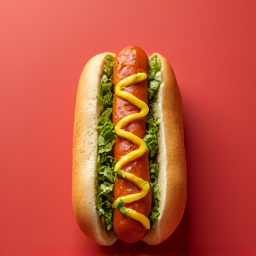

-------


In [ ]:
for i in range(1,6):
    image = load_and_resize_image(f"./hotdog_or_not/{i}.png")
    prompt = processor.apply_chat_template(
        get_messages(image,base_prompt=base_prompt), 
        tokenize=False, 
        add_generation_prompt=True
    )
    print(hotdog_or_not(prompt, [image]))
    display(image)
    print("-------")